In [3]:
import pandas as pd

# Update plotting

In [4]:
y_predict = pd.read_csv('./temp-results/single_label_prediction.csv')
y_predict_true = pd.read_csv('./temp-results/single_label_true.csv')

y_predict_baseline = pd.read_csv('./temp-results/single_label_prediction_baseline.csv')
y_predict_true_baseline = pd.read_csv('./temp-results/single_label_true_baseline.csv')

/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


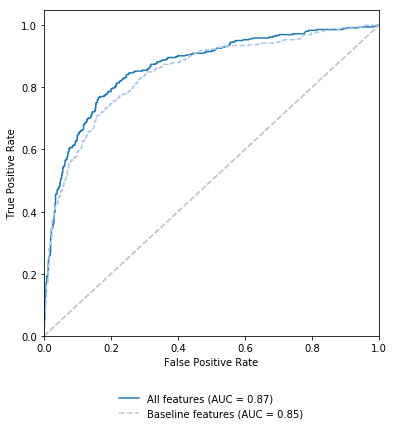

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

def plot_roc(Y_true, Y_predict_proba, label, is_dotted=False):
    fpr, tpr, _ = roc_curve(Y_true, Y_predict_proba)
    roc_auc = auc(fpr, tpr)
    colors = plt.get_cmap('tab20').colors

    if is_dotted:
        plt.plot(fpr, tpr, 'k--', label='%s (AUC = %0.2f)' % (label, roc_auc), color=colors[1])
    else:
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (label, roc_auc), color=colors[0])
    plt.plot([0, 1], [0, 1], 'k--', color=colors[-5])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=1, frameon=False)

plt.figure(figsize=(6, 6))
plot_roc(y_predict_true.as_matrix(), y_predict.as_matrix()[:, 2], 'All features')
plot_roc(y_predict_true_baseline.as_matrix()[:, 1], y_predict_baseline.as_matrix()[:, 2], 'Baseline features', True)
plt.savefig('figures/binary/binary_roc_combined.pdf', bbox_inches='tight')

/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/p

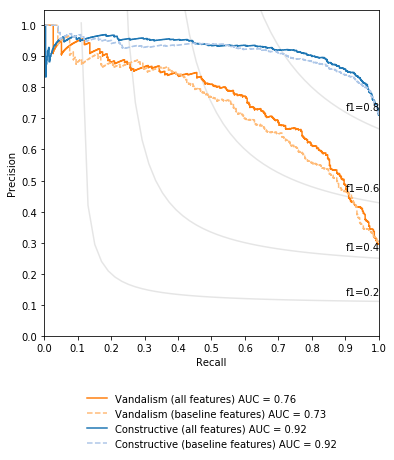

In [115]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc, roc_curve
import numpy as np

colors = plt.get_cmap('tab20').colors

plt.figure(figsize=(6, 6))

y_true_vandalism = y_predict_true.as_matrix()
y_predict_vandalism = y_predict.as_matrix()[:, 2]

y_true_constructive = np.invert(y_predict_true.as_matrix())
y_predict_constructive = y_predict.as_matrix()[:, 1]

y_true_vandalism_baseline = y_predict_true_baseline.as_matrix()[:, 1]
y_predict_vandalism_baseline = y_predict_baseline.as_matrix()[:, 2]

y_true_constructive_baseline = y_predict_true_baseline.as_matrix()[:, 0]
y_predict_constructive_baseline = y_predict_baseline.as_matrix()[:, 1]

f_scores = np.linspace(0.2, 0.8, num=4)
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Vandalism: All features
precision, recall, thresholds = precision_recall_curve(y_true_vandalism, y_predict_vandalism)
precision_baseline, recall_baseline, thresholds_baseline = precision_recall_curve(y_true_vandalism, y_predict_vandalism)
pr_auc = auc(recall, precision)
plt.step(recall, precision, color=colors[2], where='post', label='Vandalism (all features) AUC = %0.2f' % pr_auc)

# Vandalism: Baseline
precision, recall, thresholds = precision_recall_curve(y_true_vandalism_baseline, y_predict_vandalism_baseline)
precision_baseline, recall_baseline, thresholds_baseline = precision_recall_curve(y_true_vandalism_baseline, y_predict_vandalism_baseline)
pr_auc = auc(recall, precision)
plt.step(recall, precision, color=colors[3], linestyle='--', where='post', label='Vandalism (baseline features) AUC = %0.2f' % pr_auc)

# Constructive: All features
precision, recall, thresholds = precision_recall_curve(y_true_constructive, y_predict_constructive)
precision_baseline, recall_baseline, thresholds_baseline = precision_recall_curve(y_true_vandalism, y_predict_vandalism)
pr_auc = auc(recall, precision)
plt.step(recall, precision, color=colors[0], where='post', label='Constructive (all features) AUC = %0.2f' % pr_auc)

# Constructive: Baseline
precision, recall, thresholds = precision_recall_curve(y_true_constructive_baseline, y_predict_constructive_baseline)
precision_baseline, recall_baseline, thresholds_baseline = precision_recall_curve(y_true_constructive_baseline, y_predict_constructive_baseline)
pr_auc = auc(recall, precision)
plt.step(recall, precision, color=colors[1], linestyle='--', where='post', label='Constructive (baseline features) AUC = %0.2f' % pr_auc)

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), frameon=False)
plt.savefig('figures/binary/binary_precision_recall_combined.pdf', bbox_inches='tight')